<a href="https://colab.research.google.com/github/maxwellrandolph/ISTM631---Professor-Arash/blob/master/URL_%3E_CSV(Arash).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
base_url = requests.get('https://www.indeed.com/cmp/Google/reviews?fcountry=ALL&start=', timeout=5)
print(base_url.text)

In [ ]:
def parse(full_url):
    page_content = BeautifulSoup(full_url.content, 'lxml')
    containers = page_content.findAll('div', 
                 {'class':'cmp-Review-container'})
    df = pd.DataFrame(columns = 
         ['rating', 'rating_title',  'rating_description',
                         'rating_pros', 'rating_cons'])
    
    for item in containers:
        try:
            rating = item.find('div', 
                     {'class': 'cmp-ReviewRating-text'}).text.replace('\n', '')
        except:
            rating = None
        try:
            rating_title = item.find('div', 
                           {'class': 'cmp-Review-title'}).text.replace('\n', '')
        except:
            rating_title = None
        try:
            rating_description = item.find('span', 
                                 {'itemprop': 'reviewBody'}).text.replace('\r', '. ')
        except:
            rating_description = None
        try:
            rating_pros = item.find('div', 
                          {'class': 'cmp-ReviewProsCons-prosText'}).text.replace('\n', '')
        except:
            rating_pros = None
        try:
            rating_cons = item.find('div', 
                          {'class': 'cmp-ReviewProsCons-consText'}).text.replace('\n', '')
        except:
            rating_cons = None
        df = df.append({'rating': rating, 
             'rating_title': rating_title, 
             'rating_description': rating_description,
             'rating_pros': rating_pros, 
             'rating_cons': rating_cons}, ignore_index=True)
    return df

In [ ]:
def parse(full_url):
    page_content = BeautifulSoup(full_url.content, 'lxml')
    containers = page_content.findAll('div', 
                 {'class':'cmp-Review-container'})
    df = pd.DataFrame(columns = 
         ['rating', 'rating_title',  'rating_description',
                         'rating_pros', 'rating_cons'])
    
    for item in containers:        
        try:
            rating = item.find('div', 
                     {'class': 'cmp-ReviewRating-text'}).text.replace('\n', '')
        except:
            rating = None
        try:
            rating_title = item.find('div', 
                           {'class': 'cmp-Review-title'}).text.replace('\n', '')
        except:
            rating_title = None
        try:
            rating_description = item.find('span', 
                                 {'itemprop': 'reviewBody'}).text.replace('\r', '. ')
        except:
            rating_description = None
        try:
            rating_pros = item.find('div', 
                          {'class': 'cmp-ReviewProsCons-prosText'}).text.replace('\n', '')
        except:
            rating_pros = None
        try:
            rating_cons = item.find('div', 
                          {'class': 'cmp-ReviewProsCons-consText'}).text.replace('\n', '')
        except:
            rating_cons = None
        df = df.append({'rating': rating, 
             'rating_title': rating_title, 
             'rating_description': rating_description,
             'rating_pros': rating_pros, 
             'rating_cons': rating_cons}, ignore_index=True)
    return df

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
base_url = 'https://www.indeed.com/cmp/Google/reviews?fcountry=ALL&start='
all_reviews_df = pd.DataFrame(columns = ['rating', 'rating_title', 
'rating_description','rating_pros', 'rating_cons'])
num_reviews = 20
# you can adjust this number on how many reviews you which to scrape
while num_reviews < 3000:  
    
    full_url = base_url + str(num_reviews)
    
    get_url = requests.get(full_url, timeout=5)  
        
    partial_reviews_df = parse(get_url)   
    all_reviews_df = all_reviews_df.append(
                     partial_reviews_df, ignore_index=True) 
    
    num_reviews += 20

In [ ]:
all_reviews_df.to_csv('indeed_scrape.csv')

In [ ]:
all_reviews_df

,rating,rating_title,rating_description,rating_pros,rating_cons
0,4.0,Great experience,-Worked as a contractor and was able to meet i...,None,None
1,5.0,typest,ndeed is a fantastic place to work and your co...,culture,None
2,5.0,Fun Place to work,"Google has their own culture, what you see in ...","Free lunches, Lear alot, gBus commute",No cons
3,4.0,Contracting at Google is what you make it,The potential upward mobility as a contractor ...,"Free lunch, Upward mobility","Work life balance, TVC inequality"
4,3.0,Google Cloud has a lot of challenges,"Working at Google cloud has many challenges, a...","Good benefits, the company is going after the ...","Unprepared management, to many escalation leve..."
...,...,...,...,...,...
2935,5.0,Fun workplace,My everyday routine at Google was to correct a...,Free Meals.,None
2936,4.0,Productive,The position was very productive. Help manage ...,"Free lunches, Great Pay",Short Brakes
2937,5.0,Freedom working from home!,I got to work at home on my computer everyday ...,Freedom working from home!,Benefits weren't great
2938,5.0,Freedom working from home!,I got to work at home on my computer everyday ...,Freedom working from home!,Benefits weren't great


In [ ]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [ ]:
df = all_reviews_df

df.describe()

,rating,rating_title,rating_description,rating_pros,rating_cons
count,2940,2940,2940,1110,997
unique,5,2329,2794,938,883
top,5.0,Great experience,-Worked as a contractor and was able to meet i...,Free lunches,none
freq,1563,148,140,29,18


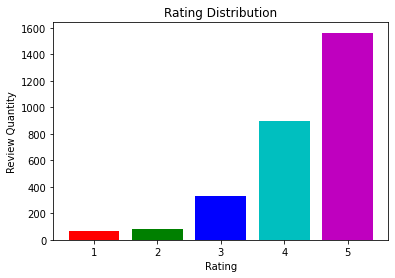

In [ ]:
groups = df.groupby('rating').count()
Values = groups.rating_title
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

pseudo language

In [ ]:
type(df['rating'][0])

str

In [ ]:
type(float(df['rating'][0]))

float

In [ ]:
df['binary_class'] = np.where(df['rating'].astype(float) > 3, 1, 0)
df

,rating,rating_title,rating_description,rating_pros,rating_cons,binary_class
0,4.0,Great experience,-Worked as a contractor and was able to meet i...,None,None,1
1,5.0,typest,ndeed is a fantastic place to work and your co...,culture,None,1
2,5.0,Fun Place to work,"Google has their own culture, what you see in ...","Free lunches, Lear alot, gBus commute",No cons,1
3,4.0,Contracting at Google is what you make it,The potential upward mobility as a contractor ...,"Free lunch, Upward mobility","Work life balance, TVC inequality",1
4,3.0,Google Cloud has a lot of challenges,"Working at Google cloud has many challenges, a...","Good benefits, the company is going after the ...","Unprepared management, to many escalation leve...",0
...,...,...,...,...,...,...
2935,5.0,Fun workplace,My everyday routine at Google was to correct a...,Free Meals.,None,1
2936,4.0,Productive,The position was very productive. Help manage ...,"Free lunches, Great Pay",Short Brakes,1
2937,5.0,Freedom working from home!,I got to work at home on my computer everyday ...,Freedom working from home!,Benefits weren't great,1
2938,5.0,Freedom working from home!,I got to work at home on my computer everyday ...,Freedom working from home!,Benefits weren't great,1


In [ ]:
import pandas as pd
import pandas_datareader as pdr
import datetime 
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2009, 10, 1),
                          end=datetime.datetime(2020, 10, 5))

In [ ]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-29,115.309998,113.570000,114.550003,114.089996,99382200.0,114.089996
2020-09-30,117.260002,113.620003,113.790001,115.809998,142675200.0,115.809998
2020-10-01,117.720001,115.830002,117.639999,116.790001,116120400.0,116.790001
2020-10-02,115.370003,112.220001,112.889999,113.019997,144712000.0,113.019997
2020-10-05,116.650002,113.550003,113.910004,116.500000,105720800.0,116.500000


In [ ]:
aapl['diff'] = aapl.Open - aapl.Close

aapl['diff2']= aapl.High - aapl.Low

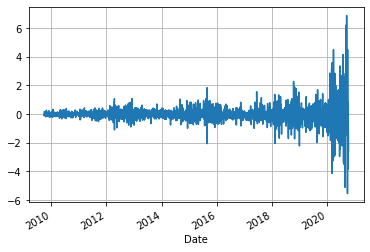

In [ ]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['diff'].plot(grid=True)

# Show the plot
plt.show()